In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from distfit import distfit

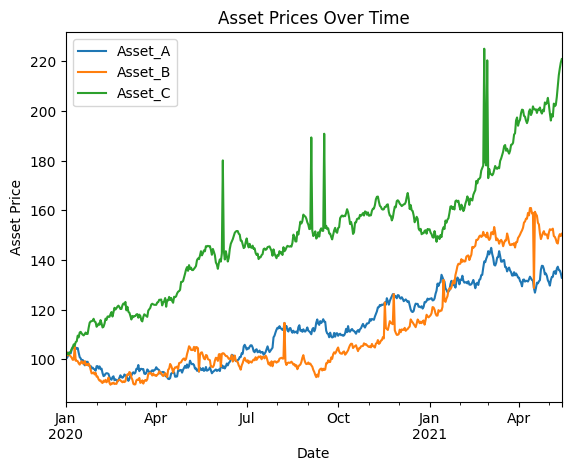

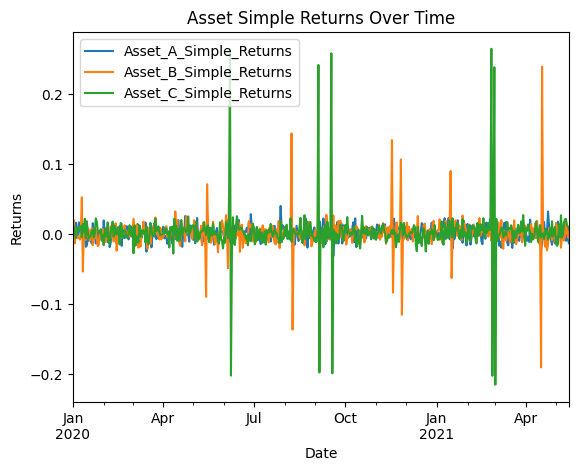

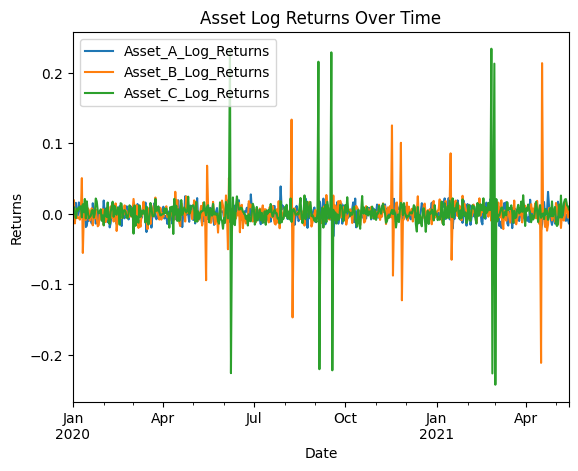

          Asset_A     Asset_B     Asset_C  Asset_A_Simple_Returns  \
count  500.000000  500.000000  500.000000              500.000000   
mean   112.817692  112.038347  150.835768                0.000606   
std     15.283891   20.834097   25.543599                0.009825   
min     91.063224   89.788210  101.459910               -0.031409   
25%     97.239375   97.882227  136.371153               -0.006482   
50%    111.296391  102.125913  150.598171                0.000614   
75%    127.123302  120.224188  162.065194                0.006891   
max    144.897507  160.927175  225.055912                0.039799   

       Asset_B_Simple_Returns  Asset_C_Simple_Returns  Asset_A_Log_Returns  \
count              500.000000              500.000000           500.000000   
mean                 0.001060                0.002122             0.000557   
std                  0.023003                0.033972             0.009810   
min                 -0.190470               -0.215185            -

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
asset_data = pd.read_csv("data_lab_warmup.csv")
asset_data.index = pd.to_datetime(asset_data['Date'])
asset_data = asset_data['Asset_A'], asset_data['Asset_B'], asset_data['Asset_C'];
asset_data = pd.DataFrame(asset_data).ffill().bfill().drop_duplicates().transpose();
price_plot = asset_data.plot().set_ylabel('Asset Price');
plt.title('Asset Prices Over Time');
plt.show();
asset_data['Asset_A_Simple_Returns'] = asset_data['Asset_A'].pct_change().fillna(0.0)
asset_data['Asset_B_Simple_Returns'] = asset_data['Asset_B'].pct_change().fillna(0.0)
asset_data['Asset_C_Simple_Returns'] = asset_data['Asset_C'].pct_change().fillna(0.0)

asset_data['Asset_A_Log_Returns'] = np.log(asset_data['Asset_A'] / asset_data['Asset_A'].shift(1)).fillna(0.0)
asset_data['Asset_B_Log_Returns'] = np.log(asset_data['Asset_B'] / asset_data['Asset_B'].shift(1)).fillna(0.0)
asset_data['Asset_C_Log_Returns'] = np.log(asset_data['Asset_C'] / asset_data['Asset_C'].shift(1)).fillna(0.0)

asset_data_simple_returns = asset_data['Asset_A_Simple_Returns'], asset_data['Asset_B_Simple_Returns'], asset_data['Asset_C_Simple_Returns']
asset_data_simple_returns = pd.DataFrame(asset_data_simple_returns).ffill().bfill().drop_duplicates().transpose();
simple_returns_plot = asset_data_simple_returns.plot().set_ylabel('Returns');
plt.title('Asset Simple Returns Over Time');
plt.show();

asset_data_log_returns = asset_data['Asset_A_Log_Returns'], asset_data['Asset_B_Log_Returns'], asset_data['Asset_C_Log_Returns']
asset_data_log_returns = pd.DataFrame(asset_data_log_returns).ffill().bfill().drop_duplicates().transpose();
asset_data_log_returns = asset_data_log_returns.plot().set_ylabel('Returns');
plt.title('Asset Log Returns Over Time');
plt.show();

print(asset_data.describe())

returns_columns = [
    'Asset_A_Simple_Returns', 
    'Asset_B_Simple_Returns', 
    'Asset_C_Simple_Returns'
]

for col_name in returns_columns:
    print(f"\n--- Analyzing Distribution for {col_name} ---")
    
    data_to_fit = asset_data[col_name].values
    
    dfit = distfit(alpha=0.05, distr='full') 
    
    dfit.fit(data_to_fit)
    
    print(f"Best fit found: {dfit.model['name']}")
    print(f"Parameters: {dfit.model['params']}")
    
    dfit.plot()
    plt.title(f'Distribution fit for {col_name}')
    plt.show()